#Mouse Navigating Maze in Virtual Reality

## Setup evnironment and plotting

In [3]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')

## Load covariates and maze information

In [4]:
basePath = '/Users/sofroniewn/Documents/DATA/mVR_python'

In [5]:
with open(os.path.join(basePath,'covariates.json')) as fp:    
    params = pd.DataFrame(json.load(fp))

In [6]:
maze = np.load(os.path.join(basePath,'maze.npy')).transpose(2, 0, 1)
reward = np.load(os.path.join(basePath,'reward.npy'))

## Plot maze and trajectory through maze

A maze consists of trapazoidal patches, called `branches`, which are stiched together.

There is also one reward location, which is also a trapazoidal patch.

In [7]:
def draw(maze, reward):
    for branch in maze:
        plt.fill(branch[0,:], branch[1,:], edgecolor=[0.7,0.7,0.7], facecolor=[0.7,0.7,0.7], lw=1.5);
    plt.fill(reward[0], reward[1], edgecolor=[0.9,0.9,0.9], facecolor=[0.9,0.9,0.9]);
    plt.axis('off')

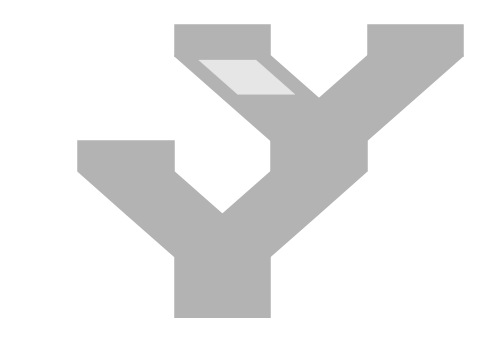

In [8]:
draw(maze, reward)

In [9]:
def trace(params, trial):
    if not isinstance(trial, (list, tuple)):
        trial = [trial]
    for t in trial:
        plt.plot(params.xMazePos[params.trialNum == t],params.yMazePos[params.trialNum == t]);

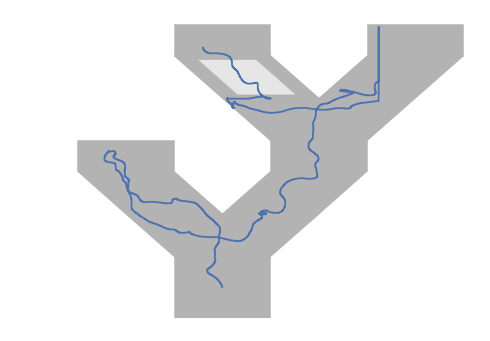

In [10]:
draw(maze, reward)
trace(params, 0)

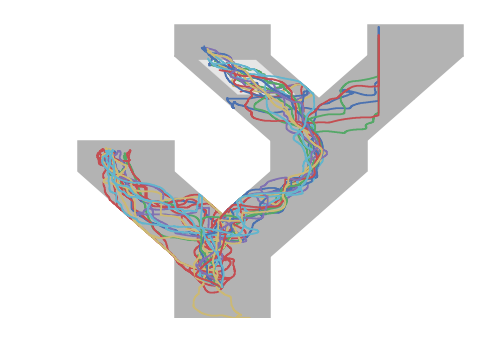

In [11]:
draw(maze, reward)
trace(params, range(0,18))